###### Objective: To predict whether a customer will Churn based on his/her telecom usage information
Used Python 3 and Anaconda Jupyter Notebook For Creating The Poject
The Steps followed by me throughout the project were as follows
1) Understanding the Dataset
2) Importing The required Models
3) Data Cleaning (treating missing values, check for colrelations,dropping less sisgnificant values)
4) Model Building
5) Prediction
6) Checking the Accuracy

In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [296]:
df=pd.read_csv('churn.csv',index_col=0)

In [297]:
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,?,...,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,?,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,?,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [298]:
print(df.isnull().sum())

State             0
Account Length    0
Area Code         0
Phone             0
Int'l Plan        0
VMail Plan        0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn?            0
dtype: int64


######    Replacing all missing values represented as '?' by np.nan

In [299]:
df=df.replace(['?'], np.nan)

In [300]:
df.isnull().sum()

State               0
Account Length      0
Area Code         173
Phone               0
Int'l Plan        528
VMail Plan        349
VMail Message       0
Day Mins            0
Day Calls           0
Day Charge        112
Eve Mins           88
Eve Calls         520
Eve Charge          0
Night Mins          0
Night Calls         0
Night Charge      310
Intl Mins           0
Intl Calls        662
Intl Charge       352
CustServ Calls      0
Churn?              0
dtype: int64

In [301]:
df.select_dtypes(include=[np.object]).isnull().sum()

State             0
Area Code       173
Phone             0
Int'l Plan      528
VMail Plan      349
Day Charge      112
Eve Mins         88
Eve Calls       520
Night Charge    310
Intl Calls      662
Intl Charge     352
Churn?            0
dtype: int64

###### Treating missung values with dtype=object by mode value

In [302]:
for value in ('Area Code','Int\'l Plan','VMail Plan','Day Charge','Eve Mins','Eve Calls','Night Charge','Intl Calls','Intl Charge'):
    df[value].fillna(df[value].mode()[0],inplace=True)

In [303]:
df.select_dtypes(include=[np.object]).isnull().sum()

State           0
Area Code       0
Phone           0
Int'l Plan      0
VMail Plan      0
Day Charge      0
Eve Mins        0
Eve Calls       0
Night Charge    0
Intl Calls      0
Intl Charge     0
Churn?          0
dtype: int64

In [304]:
df.select_dtypes(include=[np.number]).isnull().sum()

Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Intl Mins         0
CustServ Calls    0
dtype: int64

In [305]:
df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
CO     66
WA     66
NV     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
DE     61
NE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
State             3333 non-null object
Account Length    3333 non-null int64
Area Code         3333 non-null object
Phone             3333 non-null object
Int'l Plan        3333 non-null object
VMail Plan        3333 non-null object
VMail Message     3333 non-null int64
Day Mins          3333 non-null float64
Day Calls         3333 non-null int64
Day Charge        3333 non-null object
Eve Mins          3333 non-null object
Eve Calls         3333 non-null object
Eve Charge        3333 non-null float64
Night Mins        3333 non-null float64
Night Calls       3333 non-null int64
Night Charge      3333 non-null object
Intl Mins         3333 non-null float64
Intl Calls        3333 non-null object
Intl Charge       3333 non-null object
CustServ Calls    3333 non-null int64
Churn?            3333 non-null object
dtypes: float64(4), int64(5), object(12)
memory usage: 572.9+ KB


In [307]:
loan_correlation = df.corr()
loan_correlation

,Account Length,VMail Message,Day Mins,Day Calls,Eve Charge,Night Mins,Night Calls,Intl Mins,CustServ Calls
Account Length,1.000000,-0.004628,0.006216,0.038470,-0.006745,-0.008955,-0.013176,0.009514,-0.003796
VMail Message,-0.004628,1.000000,0.000778,-0.009548,0.017578,0.007681,0.007123,0.002856,-0.013263
Day Mins,0.006216,0.000778,1.000000,0.006750,0.007029,0.004323,0.022972,-0.010155,-0.013423
Day Calls,0.038470,-0.009548,0.006750,1.000000,-0.021449,0.022938,-0.019557,0.021565,-0.018942
Eve Charge,-0.006745,0.017578,0.007029,-0.021449,1.000000,-0.012592,0.007596,-0.011043,-0.012987
Night Mins,-0.008955,0.007681,0.004323,0.022938,-0.012592,1.000000,0.011204,-0.015207,-0.009288
Night Calls,-0.013176,0.007123,0.022972,-0.019557,0.007596,0.011204,1.000000,-0.013605,-0.012802
Intl Mins,0.009514,0.002856,-0.010155,0.021565,-0.011043,-0.015207,-0.013605,1.000000,-0.009640
CustServ Calls,-0.003796,-0.013263,-0.013423,-0.018942,-0.012987,-0.009288,-0.012802,-0.009640,1.000000


###### Checking For any Correlation present in data

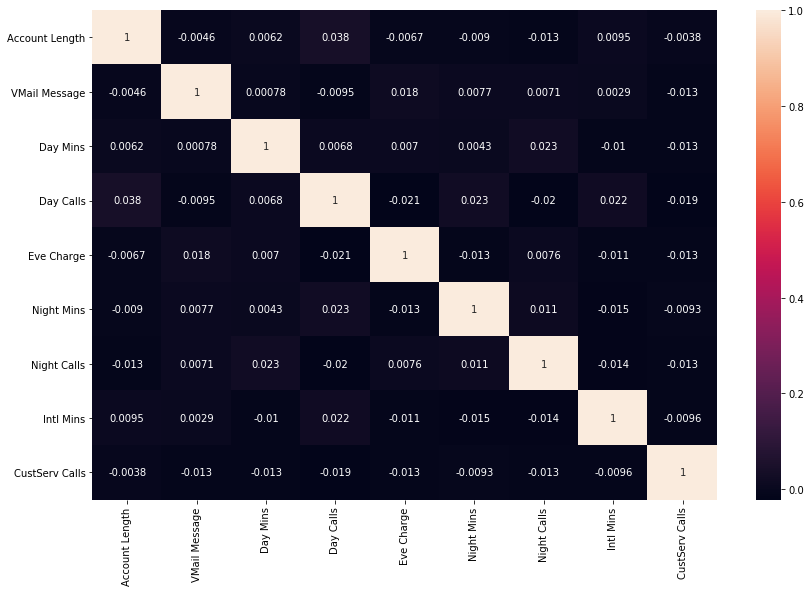

In [308]:
f, ax = plt.subplots(figsize=(14, 9))
sns.heatmap(loan_correlation, 
            xticklabels=loan_correlation.columns.values,
            yticklabels=loan_correlation.columns.values,annot= True)
plt.show()

In [309]:
colname = ['State','Int\'l Plan', 'VMail Plan','Churn?']
colname

['State', "Int'l Plan", 'VMail Plan', 'Churn?']

In [310]:
from sklearn import preprocessing
le={}
#iterate through columns and assigning it with labels 
for x in colname:
    le[x]=preprocessing.LabelEncoder()
# iterate through colname and comparing it with the labels assigned to them in le and repalcing it with label value    
for x in colname:
        df[x]=le[x].fit_transform(df[x])

In [311]:
# dropping Phone variable from the data as this value is less significant for the model building
df=df.drop("Phone",1)

In [312]:
#df['Area Code'] = pd.to_numeric(df['Area Code'].str[-4:], errors='coerce').round(0)

In [313]:
from sklearn.model_selection import train_test_split
# separting target variables from independent variables using label and index base slicing
X = df.ix[:,1:19]
Y = df["Churn?"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [315]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('CART', DecisionTreeClassifier()))

######  K fold Cross validation

In [316]:
# 10 fold Cross valiadation technique
from sklearn import model_selection
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_result = model_selection.cross_val_score(model,X_train,Y_train, cv = kfold, scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean())

LR 0.8602472396463814
CART 0.8937052932761087


In [320]:
LogR = LogisticRegression()
LogR.fit(X_train,Y_train)
Y_pred = LogR.predict(X_test)

In [321]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print(accuracy_score(Y_test, Y_pred))

print(classification_report(Y_test, Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model:",accuracy_score)

[[841  11]
 [132  16]]
0.857
             precision    recall  f1-score   support

          0       0.86      0.99      0.92       852
          1       0.59      0.11      0.18       148

avg / total       0.82      0.86      0.81      1000

Accuracy of the model: 0.857
